In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import random
import os
import seaborn as sn
import numpy as np
import glob

Δημιουργία ενός λεξικού το οποίο αναθέτει έναν αριθμό σε κάθε δραστηριότητα, με βάση την εκφώνηση.

In [3]:
Activities={
1: 'walking',	
2: 'running',	
3: 'shuffling',
4: 'stairs (ascending)',	
5: 'stairs (descending)',
6: 'standing',	
7: 'sitting',	
8: 'lying',	
13: 'cycling (sit)',	
14: 'cycling (stand)',	
130: 'cycling (sit, inactive)',
140: 'cycling (stand, inactive)'
}
colors = ['r', 'OrangeRed',  'y','Chartreuse', 'g', 'SpringGreen','c', 'DarkCyan', 'b', 'DarkMagenta','m', 'DarkRed']
all_sizes = np.zeros(len(Activities))

Ανάγνωση δεδομένων από ένα τυχαίο αρχείο harth και σχεδίαση γραφικής παράστασης των τιμών κάθε επιταχυνσιόμετρου σε σχέση με τον χρόνο.

Text(0.5, 0.98, 'figure S026.csv')

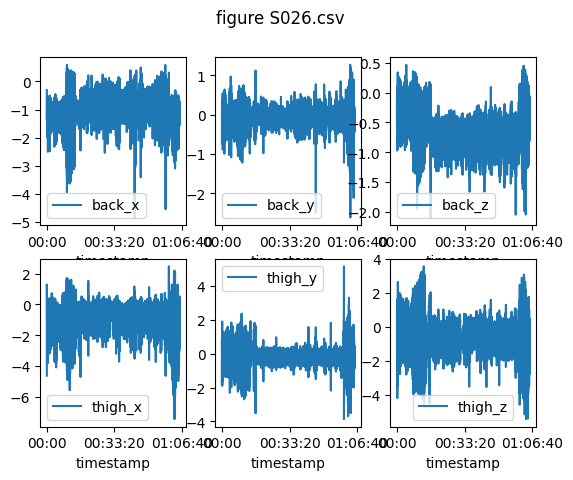

In [4]:
data_dir = './harth'
random_file = random.choice(os.listdir(data_dir))
file_path = os.path.join(data_dir, random_file)
with open(file_path,'r') as csvfile: 
    df = pd.read_csv(csvfile)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.time
fig, axes = plt.subplots(nrows = 2, ncols = 3)

sub1 = df.plot(ax = axes[0][0],x = 'timestamp', y = 'back_x')
df.plot(ax = axes[0][1],x = 'timestamp', y = 'back_y')
df.plot(ax = axes[0][2],x = 'timestamp', y = 'back_z')
df.plot(ax = axes[1][0],x = 'timestamp', y = 'thigh_x')
df.plot(ax = axes[1][1],x = 'timestamp', y = 'thigh_y')
df.plot(ax = axes[1][2],x = 'timestamp', y = 'thigh_z')

plt.suptitle('figure ' + random_file)

Εύρεση στατιστικών στοιχείων για κάθε μια από τις τιμές των επιταχυνσιόμετρων και σχεδίαση του πίνακα συσχετίσεων για το τυχαίο αρχείο (στην συγκεκριμένη περίπτωση του S026.csv). 

standard deviation:
back_x: 0.2712
back_y: 0.1294
back_z: 0.2352
thigh_x: 0.5052
thigh_y: 0.2374
thigh_z: 0.5571

mean:
back_x: -0.8956
back_y: -0.0772
back_z: -0.5764
thigh_x: -0.9158
thigh_y: -0.1909
thigh_z: -0.4638

median:
back_x: -0.8774
back_y: -0.0708
back_z: -0.6428
thigh_x: -0.9546
thigh_y: -0.1809
thigh_z: -0.5066



Text(0.5, 0.98, 'figure S026.csv')

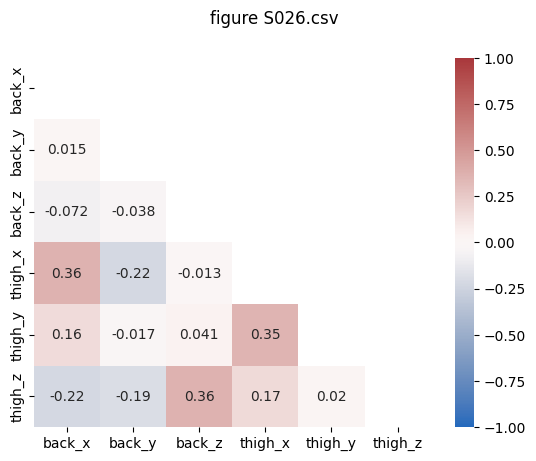

In [5]:
std_back_x = np.std(df['back_x'])
std_back_y = np.std(df['back_y'])
std_back_z = np.std(df['back_z'])
std_thigh_x = np.std(df['thigh_x'])
std_thigh_y = np.std(df['thigh_y'])
std_thigh_z = np.std(df['thigh_z'])

mean_back_x = np.mean(df['back_x'])
mean_back_y = np.mean(df['back_y'])
mean_back_z = np.mean(df['back_z'])
mean_thigh_x = np.mean(df['thigh_x'])
mean_thigh_y = np.mean(df['thigh_y'])
mean_thigh_z = np.mean(df['thigh_z'])

median_back_x = np.median(df['back_x'])
median_back_y = np.median(df['back_y'])
median_back_z = np.median(df['back_z'])
median_thigh_x = np.median(df['thigh_x'])
median_thigh_y = np.median(df['thigh_y'])
median_thigh_z = np.median(df['thigh_z'])

print("standard deviation:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(std_back_x),float(std_back_y),float(std_back_z),float(std_thigh_x),float(std_thigh_y),float(std_thigh_z)))

print("mean:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(mean_back_x),float(mean_back_y),float(mean_back_z),float(mean_thigh_x),float(mean_thigh_y),float(mean_thigh_z)))

print("median:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(median_back_x),float(median_back_y),float(median_back_z),float(median_thigh_x),float(median_thigh_y),float(median_thigh_z)))

plt.figure()
corr_matrix = df.loc[:, ~df.columns.isin(['label','timestamp'])].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
ax = sn.heatmap(
    corr_matrix,
    annot = True,
    vmax = 1,
    vmin = -1,
    center = 0,
    cmap = 'vlag',
    mask = mask
)

plt.suptitle('figure ' + random_file)

Σχεδίαση του πίνακα συσχετίσεων για όλες τις δραστηριότητες για το τυχαίο αρχείο (στην συγκεκριμένη περίπτωση του S026.csv). 

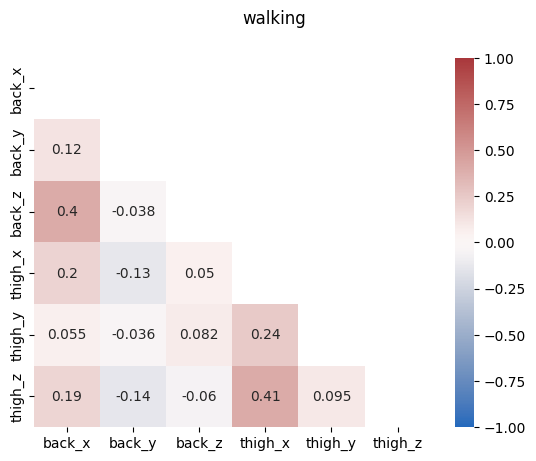

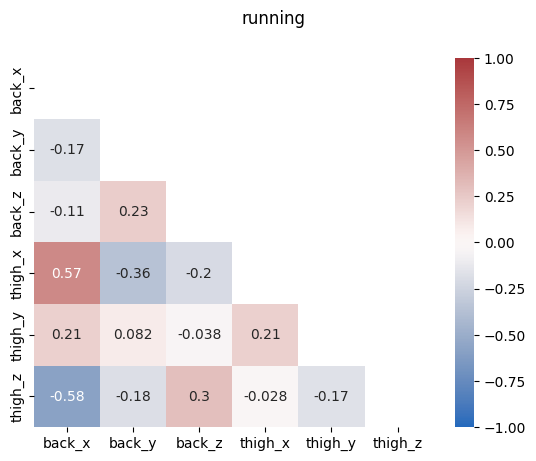

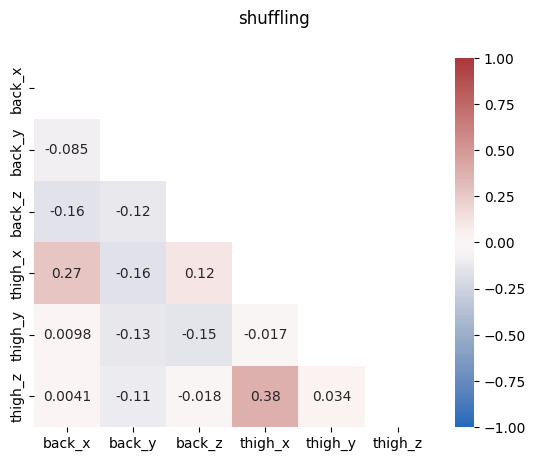

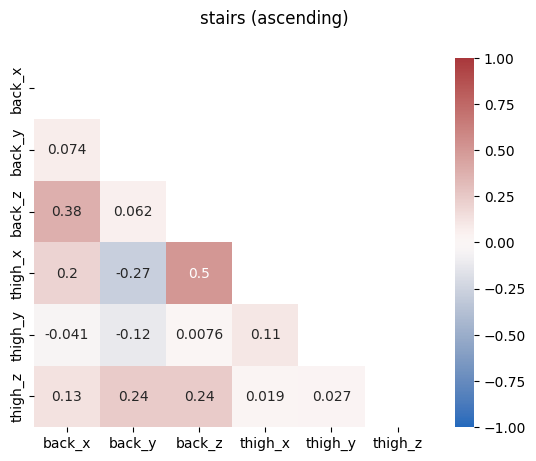

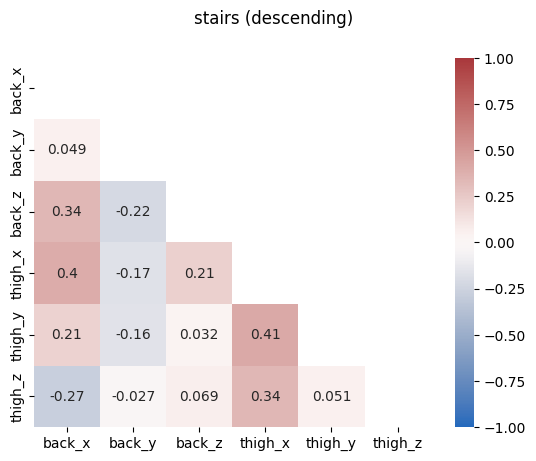

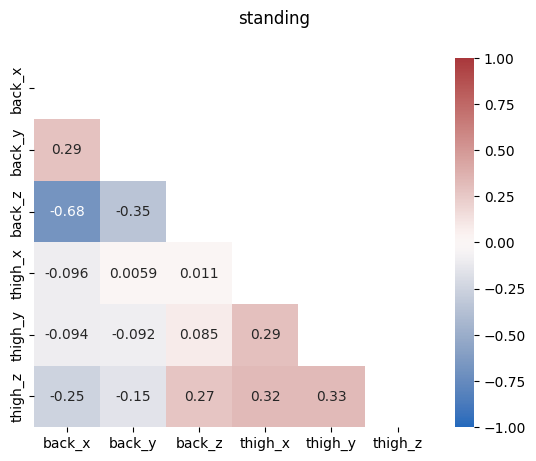

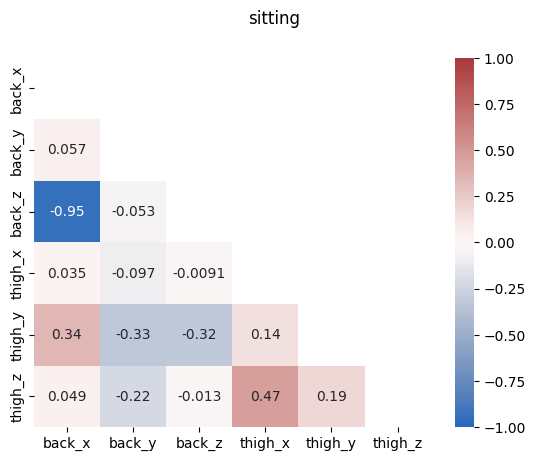

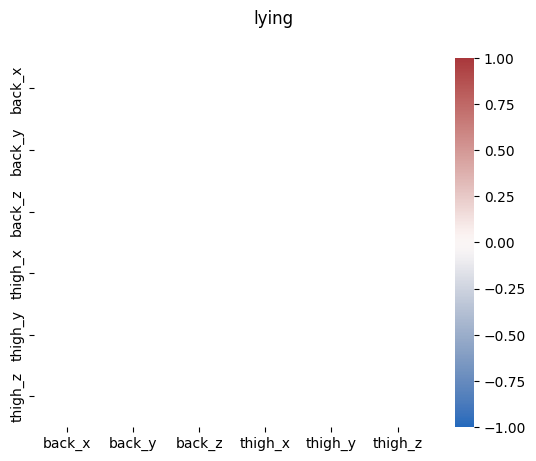

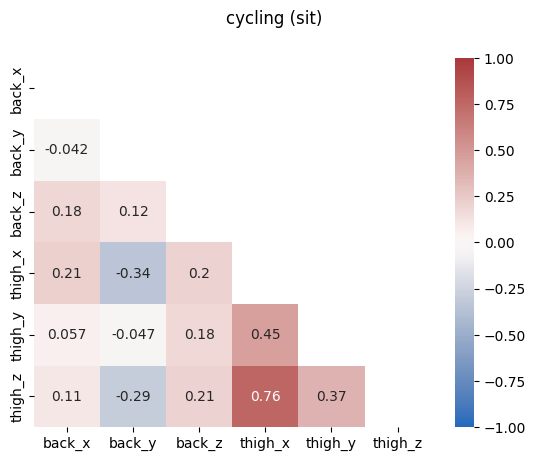

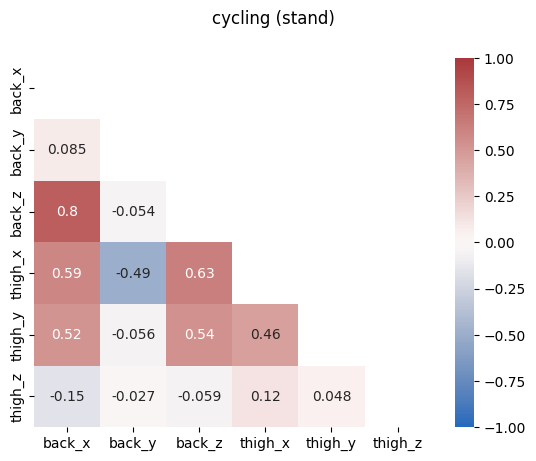

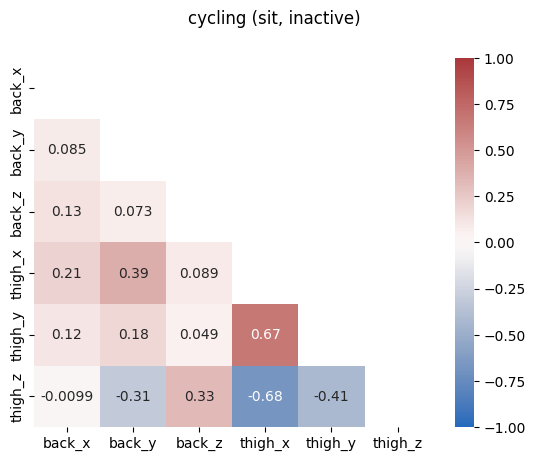

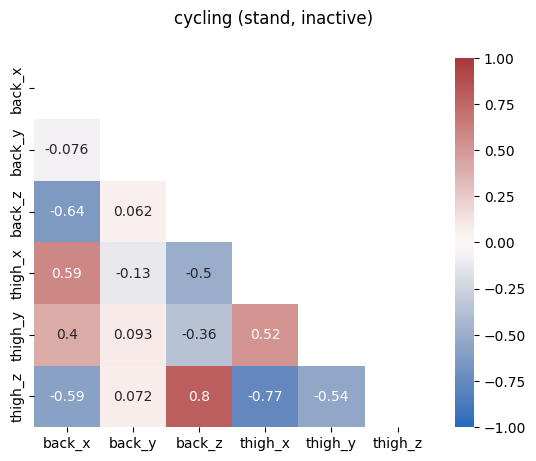

In [6]:

def corr(df, title = 'figure'+random_file):
    plt.figure()
    corr_matrix = df.loc[:, ~df.columns.isin(['label','timestamp'])].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
    ax = sn.heatmap(
        corr_matrix,
        annot = True,
        vmax = 1,
        vmin = -1,
        center = 0,
        cmap = 'vlag',
        mask = mask
    )

    plt.suptitle(title)
    return 
for act in Activities:
    df1 = df.loc[df['label']==act]
    corr(df1, title = Activities[act])


Ανάγνωση δεδομένων από τα όλα τα αρχεία harth και ένωση δεδομένων στο dataframe concat. Εύρεση στατιστικών στοιχείων για κάθε μια από τις τιμές των επιταχυνσιόμετρων και σχεδίαση του πίνακα συσχετίσεων για το dataframe concat. 

standard deviation:
back_x: 0.3776
back_y: 0.2312
back_z: 0.3647
thigh_x: 0.6263
thigh_y: 0.3885
thigh_z: 0.7361

mean:
back_x: -0.8850
back_y: -0.0133
back_z: -0.1694
thigh_x: -0.5949
thigh_y: 0.0209
thigh_z: 0.3749

median:
back_x: -0.9749
back_y: 0.0026
back_z: -0.1375
thigh_x: -0.4217
thigh_y: 0.0326
thigh_z: 0.7004



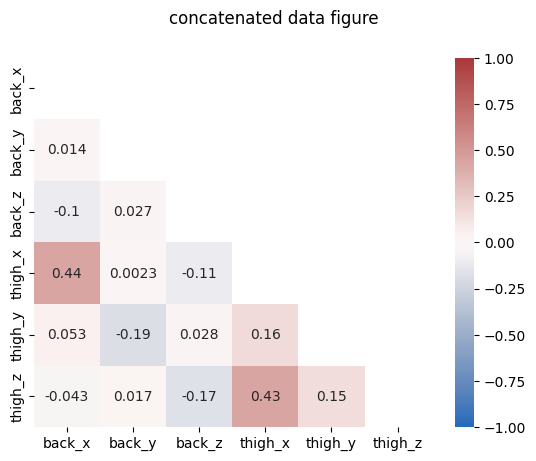

In [10]:
concat = pd.DataFrame()
for root, _, files in os.walk(data_dir):
    for file in files:
        new = pd.read_csv(os.path.join(root, file), index_col = 'timestamp')
        concat = pd.concat([concat, new])
concat.drop(labels = ['index', 'Unnamed: 0'], axis = 'columns', inplace = True)
concat.reset_index(inplace = True)
concat['timestamp'] = pd.to_datetime(concat['timestamp']).dt.time

std_back_x = np.std(concat['back_x'])
std_back_y = np.std(concat['back_y'])
std_back_z = np.std(concat['back_z'])
std_thigh_x = np.std(concat['thigh_x'])
std_thigh_y = np.std(concat['thigh_y'])
std_thigh_z = np.std(concat['thigh_z'])

mean_back_x = np.mean(concat['back_x'])
mean_back_y = np.mean(concat['back_y'])
mean_back_z = np.mean(concat['back_z'])
mean_thigh_x = np.mean(concat['thigh_x'])
mean_thigh_y = np.mean(concat['thigh_y'])
mean_thigh_z = np.mean(concat['thigh_z'])

median_back_x = np.median(concat['back_x'])
median_back_y = np.median(concat['back_y'])
median_back_z = np.median(concat['back_z'])
median_thigh_x = np.median(concat['thigh_x'])
median_thigh_y = np.median(concat['thigh_y'])
median_thigh_z = np.median(concat['thigh_z'])

print("standard deviation:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(std_back_x),float(std_back_y),float(std_back_z),float(std_thigh_x),float(std_thigh_y),float(std_thigh_z)))

print("mean:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(mean_back_x),float(mean_back_y),float(mean_back_z),float(mean_thigh_x),float(mean_thigh_y),float(mean_thigh_z)))

print("median:\nback_x: {:.4f}\nback_y: {:.4f}\nback_z: {:.4f}\nthigh_x: {:.4f}\nthigh_y: {:.4f}\nthigh_z: {:.4f}\n". 
      format(float(median_back_x),float(median_back_y),float(median_back_z),float(median_thigh_x),float(median_thigh_y),float(median_thigh_z)))

plt.figure()
corr_concat_matrix = concat.loc[:, ~concat.columns.isin(['label','timestamp'])].corr()
mask = np.triu(np.ones_like(corr_concat_matrix, dtype = bool))
ax1 = sn.heatmap(
    corr_concat_matrix,
    annot = True,
    vmax = 1,
    vmin = -1,
    center = 0,
    cmap = 'vlag',
    mask = mask
)
plt.suptitle('concatenated data figure')

plt.show()


Σχεδίαση του πίνακα συσχετίσεων για όλες τις δραστηριότητες για το dataframe concat. 

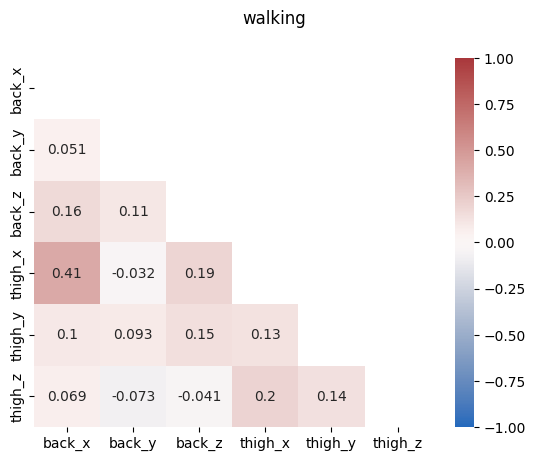

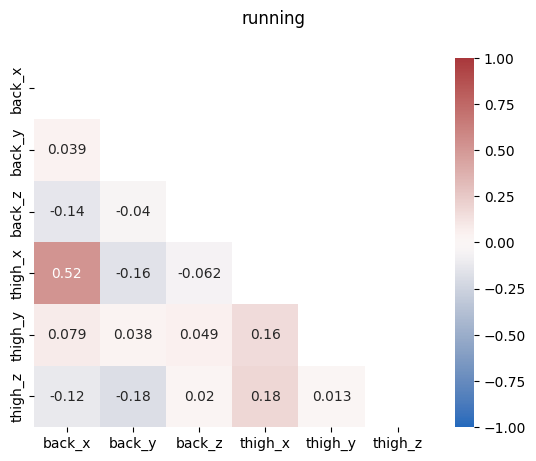

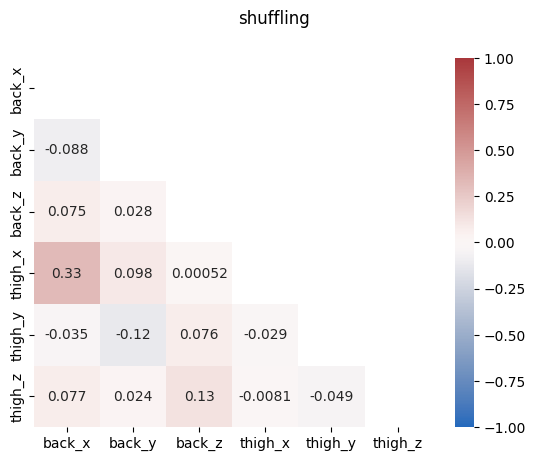

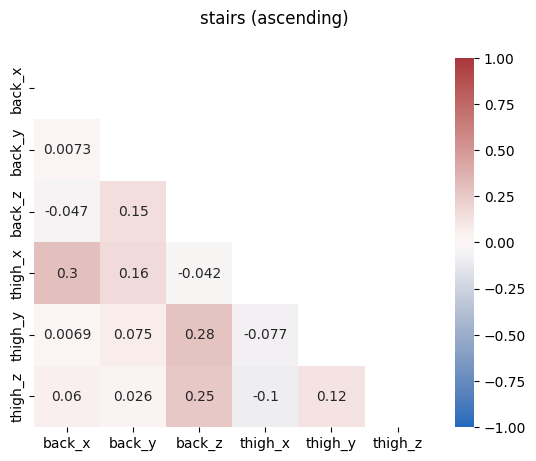

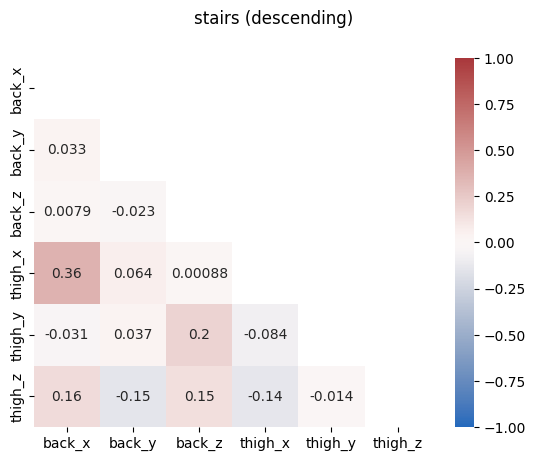

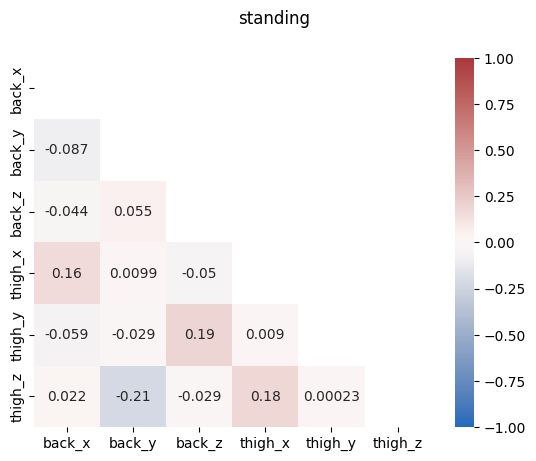

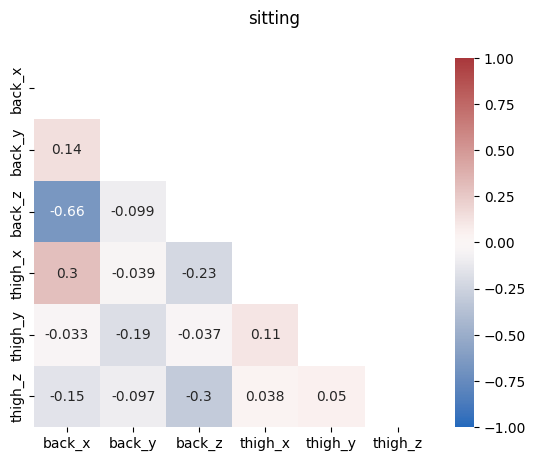

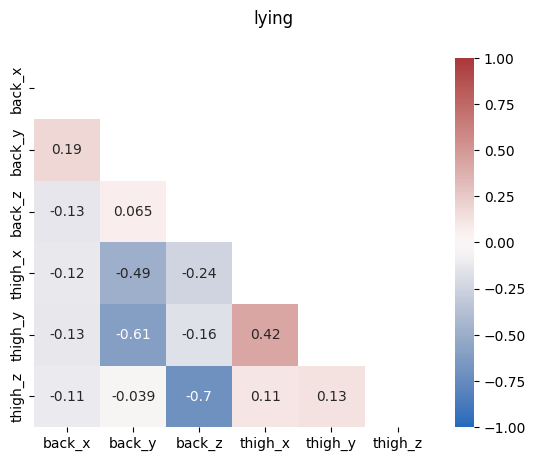

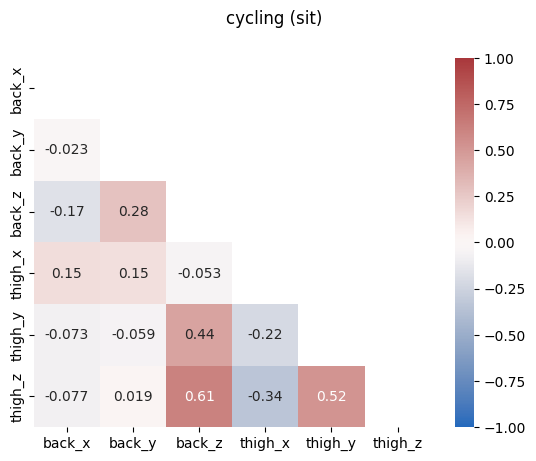

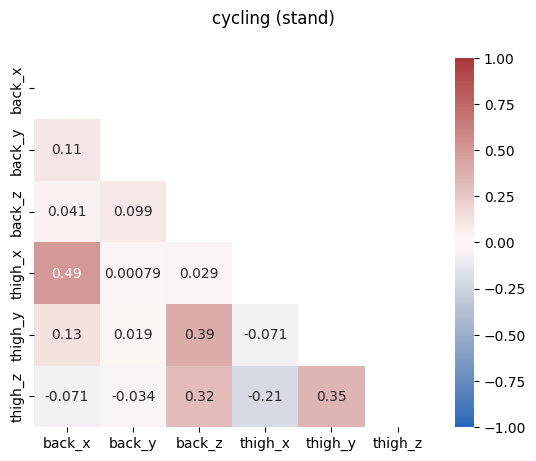

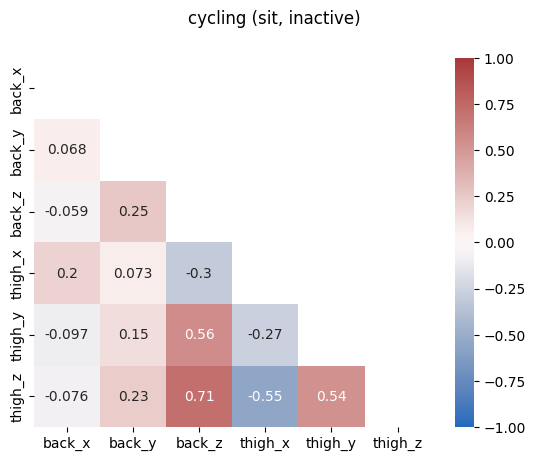

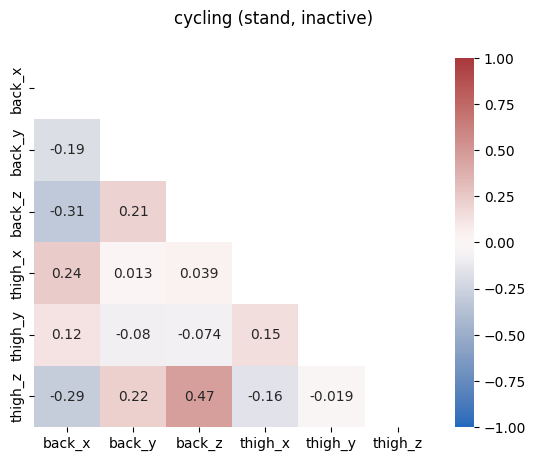

In [12]:
def corr(df, title = 'all figures'):
    plt.figure()
    corr_matrix = df.loc[:, ~df.columns.isin(['label','timestamp'])].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
    ax = sn.heatmap(
        corr_matrix,
        annot = True,
        vmax = 1,
        vmin = -1,
        center = 0,
        cmap = 'vlag',
        mask = mask
    )

    plt.suptitle(title)
    return 
for act in Activities:
    concat1 = concat.loc[concat['label']==act]
    corr(concat1, title = Activities[act])

Σχεδίαση γραφικών παραστάσεων με την μορφή πίτας κάθε αρχείου ανάλογα με τον χρόνο που αφιερώθηκε σε κάθε δραστηριότητα.

C:\Users\Thela\AppData\Local\Temp\ipykernel_30508\2904027764.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


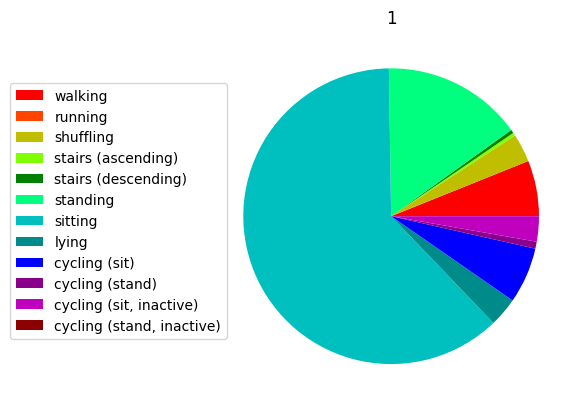

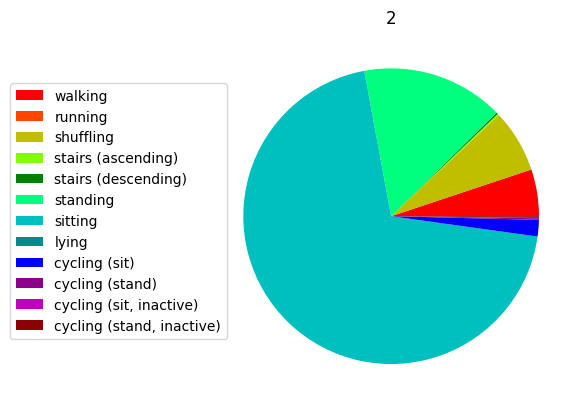

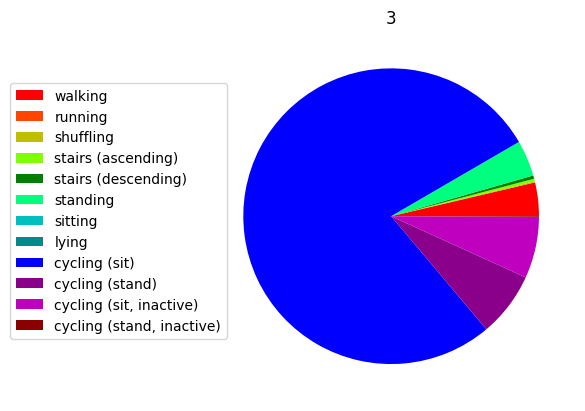

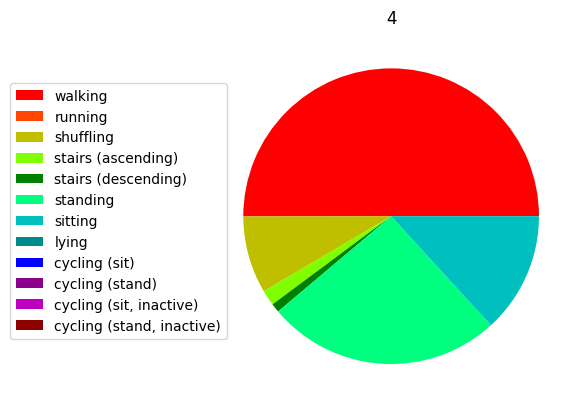

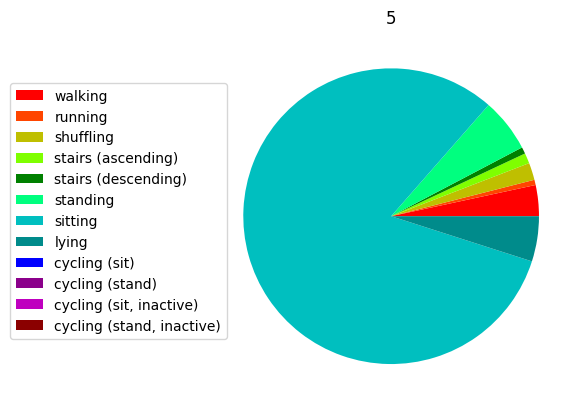

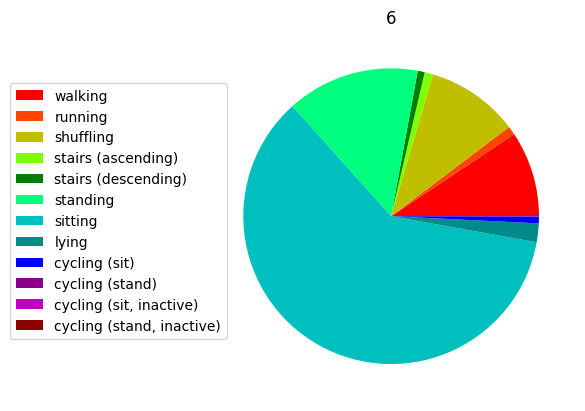

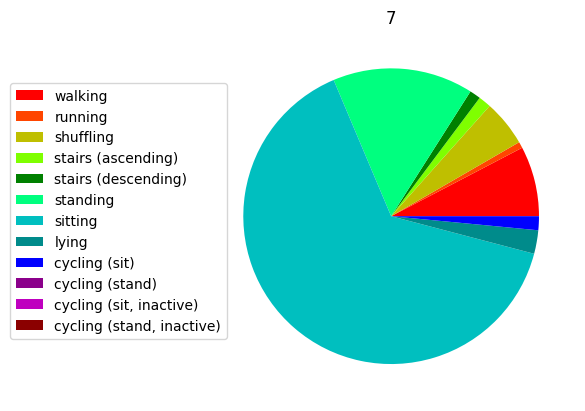

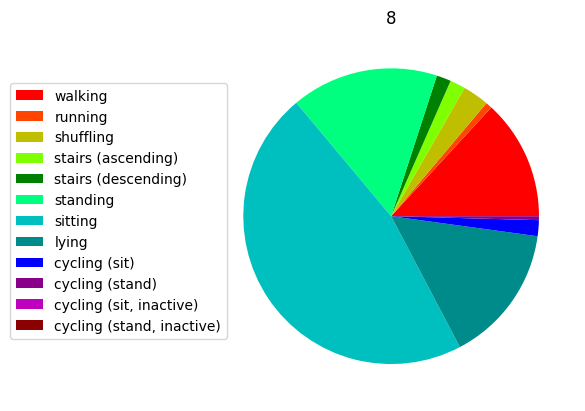

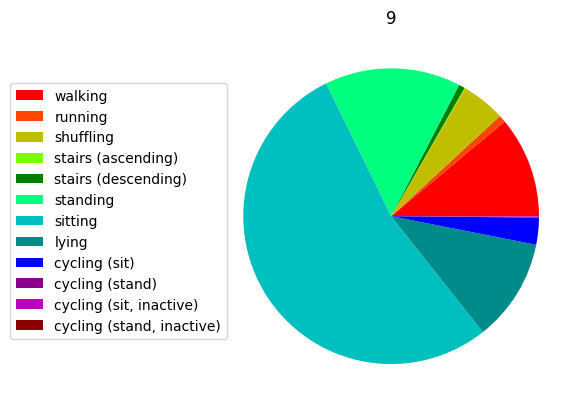

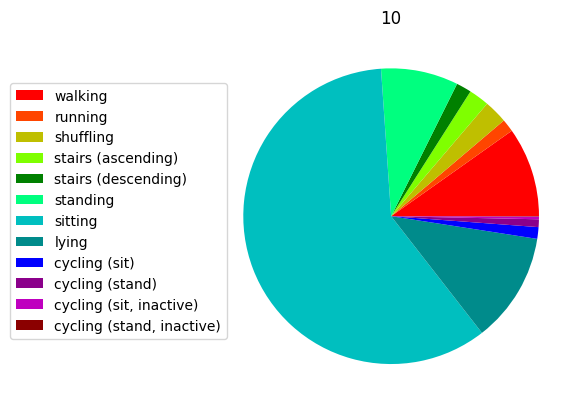

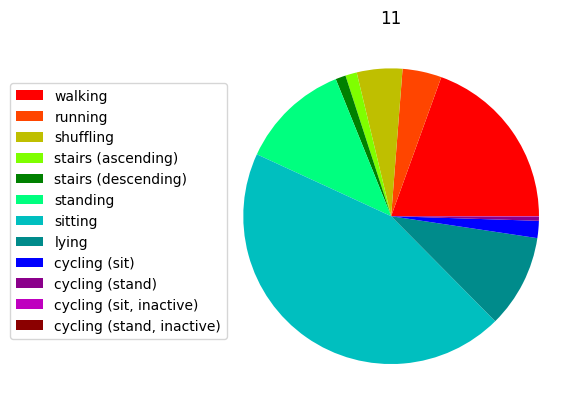

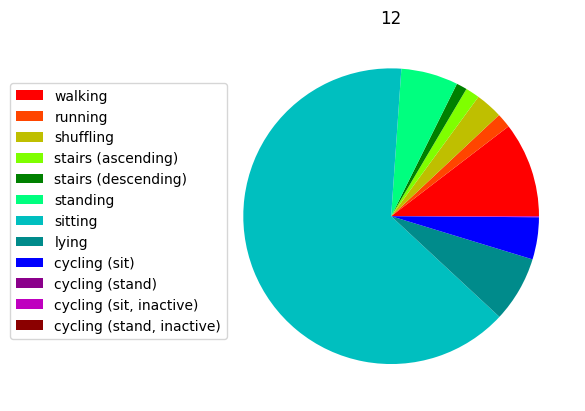

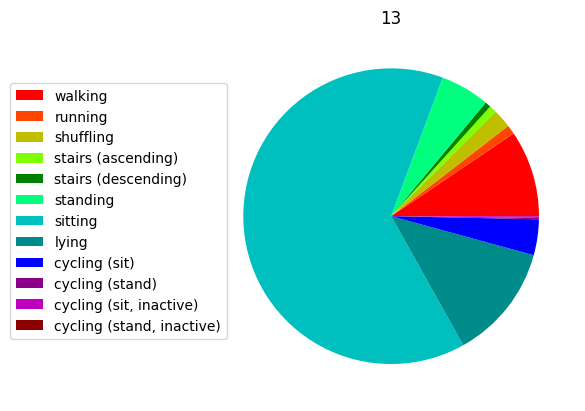

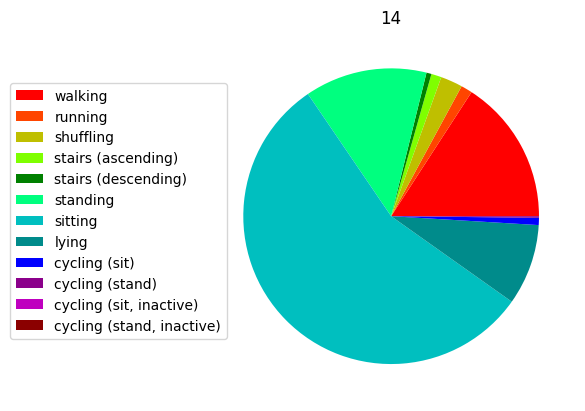

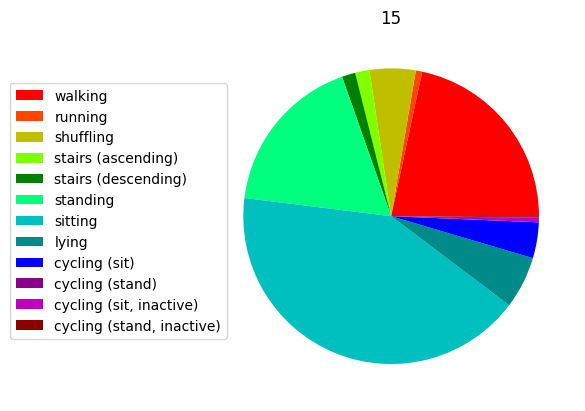

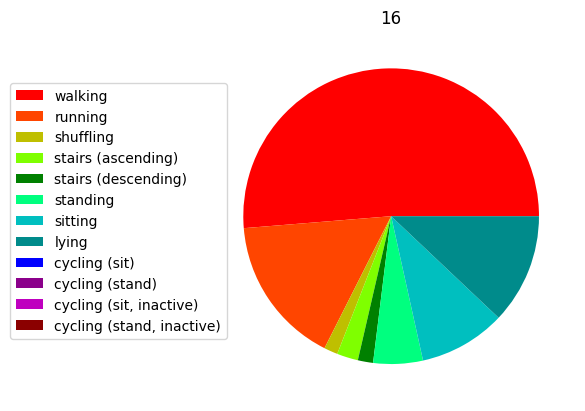

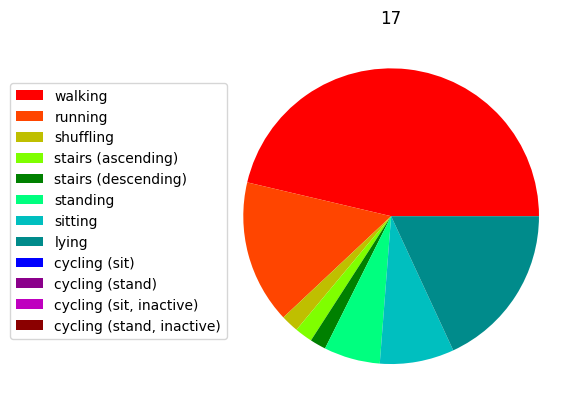

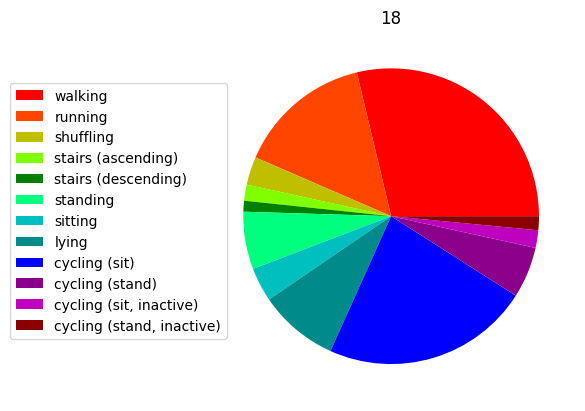

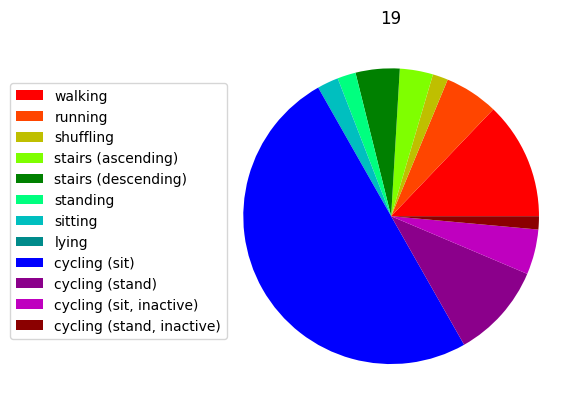

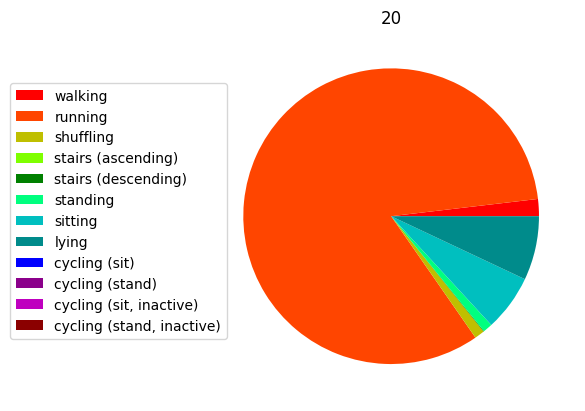

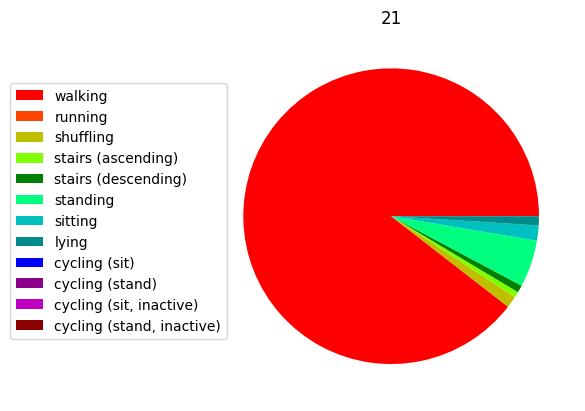

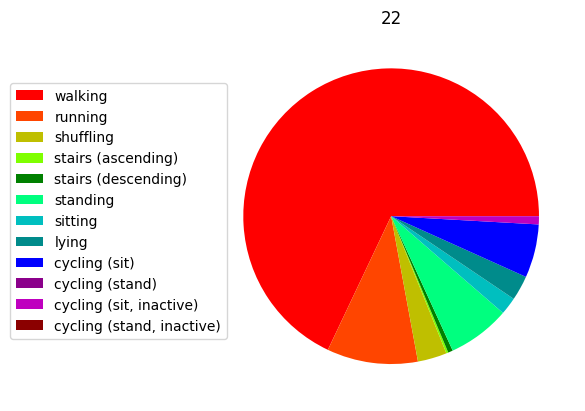

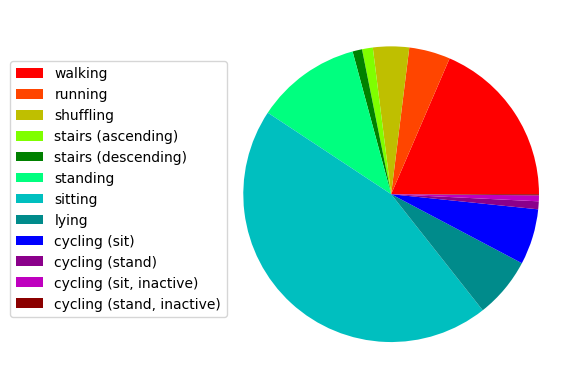

In [8]:
files = glob.glob('harth/*.csv')

dataframes = [pd.read_csv(file) for file in files] #η λίστα με τα αρχεία
for df in dataframes:
    df['timestamp'] = pd.to_datetime(df['timestamp']).apply(lambda x: x.timestamp()) #φτιάχνουμε το timestamp

ctr = 0
for individual_data in dataframes:
    x = np.array(individual_data['timestamp'])
    y = np.array(individual_data['label'])
    labels= []
    sizes = []
    

    for act in Activities:
        x_act = x[np.where(y == act)]
        seconds = len(x_act)/50
        minutes = seconds/60
        labels.append(Activities[act])
        sizes.append(minutes)
    plt.figure()
    plt.title('{}'.format(ctr+1))
    plt.pie(sizes, colors = colors)
    plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
    ctr+=1
    all_sizes = all_sizes + np.array(sizes)

plt.figure()
plt.pie(all_sizes,colors=colors)
plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
plt.show()

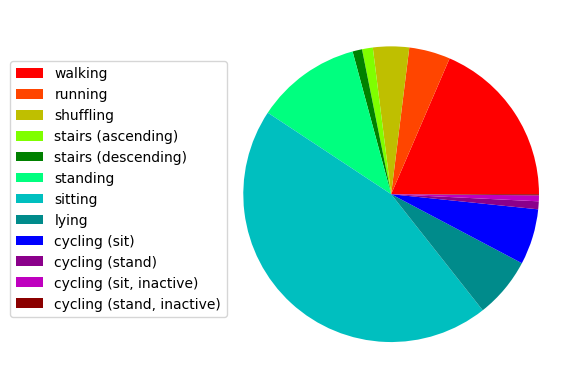

In [9]:
plt.figure()
plt.pie(all_sizes,colors=colors)
plt.legend(labels, bbox_to_anchor =(-0.55,0.15), loc = 'lower left')
plt.show()